In [16]:
import tweepy
import json
import random
import os
import pandas as pd
import time
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from twifex import *

In [17]:
twifex = Twifex()

In [18]:
consumer_key = "aPp14u2pIZo1nzwbNIHRTgsMR"
consumer_secret = "R20ioXz0eY2wsiShdgnamAjeZ0pzl6kMCptLcCgRvbIAw5SdnB"
access_token = "3341529021-f9xFmfjPrY2ETpkt8MFE1mYVth7EVJyLOoRpJ73"
access_token_secret = "KFKUjpEmydy3gi6vYNB9PZr0gAwALwDbegV6EW2xyVpAA"

In [19]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [20]:
path1 = "./tests/new_tweets/"
path2 = "./tests/people_timeline/"
path3 = "./tests/modified_tweets/"

In [22]:
new_tweets = []
for file in tqdm([i for i in os.listdir(path1) if os.path.isfile(path1+i)]):
    if ".json" in file:
        new_tweets.append(twifex.single_tweet(path1+file))
    else:
        pass

timeline_tweets = []
for file in tqdm([i for i in os.listdir(path2) if os.path.isfile(path2+i)]):
    if ".json" in file:
        timeline_tweets.append(twifex.single_tweet(path2+file))
    else:
        pass

modified_tweets = []
for file in tqdm([i for i in os.listdir(path3) if os.path.isfile(path3+i)]):
    if ".json" in file:
        modified_tweets.append(twifex.single_tweet(path3+file))
    else:
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 3673.23it/s]


In [23]:
_tweets = timeline_tweets

In [10]:
# df = pd.read_csv("./tests/new_tweets/vaccine_tweet_data.csv").sort_index(ascending=False)

In [19]:
# pd.read_csv("./tests/new_tweets/vaccine_tweet_data.csv")

In [ ]:
for i in df["id"]:
    try:
        tweet_obj = api.get_status(i, tweet_mode='extended')._json
        json.dump(tweet_obj, open(path1 + tweet_obj['id_str'] + ".json", "w"))
    except:
        print(str(i)+" does not exist")

# Collecting my timeline tweets

In [178]:
public_tweets = api.user_timeline(screen_name="Elinor_Carmi", tweet_mode='extended')
for tweet in public_tweets:
    tweet_obj = tweet._json
    json.dump(tweet_obj, open(path2 + tweet_obj['id_str'] + ".json", "w"))

In [179]:
for e in public_tweets:
    if e._json["retweeted"]:
        print("hi")

# Collecting a single tweet

In [224]:
tweet_object = api.get_status("1450108026262806533", tweet_mode='extended')

In [6]:
# pprint(tweet_object._json)

In [22]:
# tweet_object._json

# Tweet collection using search function

In [111]:
tweet_obj = []
tweet_repo = []

In [127]:
path3 = "./tests/searched_tweets/"

In [113]:
query="crisis"

In [115]:
counter = 0
while(True):
    try:
        tweet_obj = api.search(query, tweet_mode='extended')
        counter += 1
        for tweet in tweet_obj:
            tweet = tweet._json
            json.dump(tweet, open(path3 + tweet['id_str'] + ".json", "w"))
            tweet_repo.append(tweet)
        if counter == 450:
            time.sleep(900)
            counter = 0
    except:
        break

In [116]:
files = [i for i in os.listdir(path3) if os.path.isfile(path3+i)]
retweets = []


for file in files:
    tw = json.load(open(path3+file))
    if tw["retweeted"]:
        retweets.append(tw)

In [117]:
len(retweets)

0

# Testing collected tweets

In [24]:
Q = []
for file in os.listdir(path2):
    Q.append(json.load(open(path2+file)))

In [25]:
f1, f2, f3, f4 = [], [], [], []

In [31]:
len(Q)

220

In [27]:
for tweet in tqdm(Q):
    if 'retweeted_status' in tweet.keys():
        if 'quoted_status' in tweet['retweeted_status'].keys():
            f4.append(tweet)
        else:
            f2.append(tweet)
    elif 'quoted_status' in tweet.keys():
        f3.append(tweet)
    else:
        f1.append(tweet)

100%|████████████████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<?, ?it/s]


In [28]:
print(len(f1), len(f2), len(f3), len(f4))

76 99 19 26


In [32]:
len(_tweets)

220

In [11]:
f1_dict = {}
for item in f1:
    for key in item.keys():
        f1_dict[key] = f1_dict.get(key, 0) + 1
f1_set = set(f1_dict.keys())
        
        
f2_dict = {}
for item in f2:
    for key in item.keys():
        f2_dict[key] = f2_dict.get(key, 0) + 1
f2_set = set(f2_dict.keys())
        
        
f3_dict = {}
for item in f3:
    for key in item.keys():
        f3_dict[key] = f3_dict.get(key, 0) + 1
f3_set = set(f3_dict.keys())
        

f4_dict = {}
for item in f4:
    for key in item.keys():
        f4_dict[key] = f4_dict.get(key, 0) + 1
f4_set = set(f4_dict.keys())

In [12]:
key_union = f1_set.union(f2_set, f3_set, f4_set)
key_list = list(key_union)

In [13]:
grand_list = {}
for i in key_list:
    if i in f1_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f1_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]
        
    if i in f2_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f2_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]    
        
    if i in f3_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f3_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]   
        
    if i in f4_dict.keys():
        grand_list[i] = grand_list.get(i, []) + [f4_dict[i]]
    else:
        grand_list[i] = grand_list.get(i, []) + [0]

In [14]:
print(len(f1_dict.keys()), len(f2_dict.keys()), len(f3_dict.keys()), len(f4_dict.keys()))

29 27 29 29


In [15]:
grand_list

{'favorite_count': [76, 99, 19, 26],
 'geo': [76, 99, 19, 26],
 'retweeted_status': [0, 99, 0, 26],
 'extended_entities': [20, 6, 0, 0],
 'contributors': [76, 99, 19, 26],
 'quoted_status_id': [2, 0, 19, 26],
 'id': [76, 99, 19, 26],
 'id_str': [76, 99, 19, 26],
 'quoted_status_permalink': [2, 0, 19, 26],
 'source': [76, 99, 19, 26],
 'in_reply_to_user_id': [76, 99, 19, 26],
 'display_text_range': [76, 99, 19, 26],
 'place': [76, 99, 19, 26],
 'lang': [76, 99, 19, 26],
 'truncated': [76, 99, 19, 26],
 'quoted_status_id_str': [2, 0, 19, 26],
 'retweeted': [76, 99, 19, 26],
 'entities': [76, 99, 19, 26],
 'in_reply_to_status_id_str': [76, 99, 19, 26],
 'favorited': [76, 99, 19, 26],
 'coordinates': [76, 99, 19, 26],
 'possibly_sensitive': [39, 18, 19, 2],
 'created_at': [76, 99, 19, 26],
 'full_text': [76, 99, 19, 26],
 'in_reply_to_screen_name': [76, 99, 19, 26],
 'retweet_count': [76, 99, 19, 26],
 'user': [76, 99, 19, 26],
 'is_quote_status': [76, 99, 19, 26],
 'quoted_status': [0, 0,

In [16]:
df = pd.DataFrame.from_dict(grand_list, orient='index')

<AxesSubplot:>

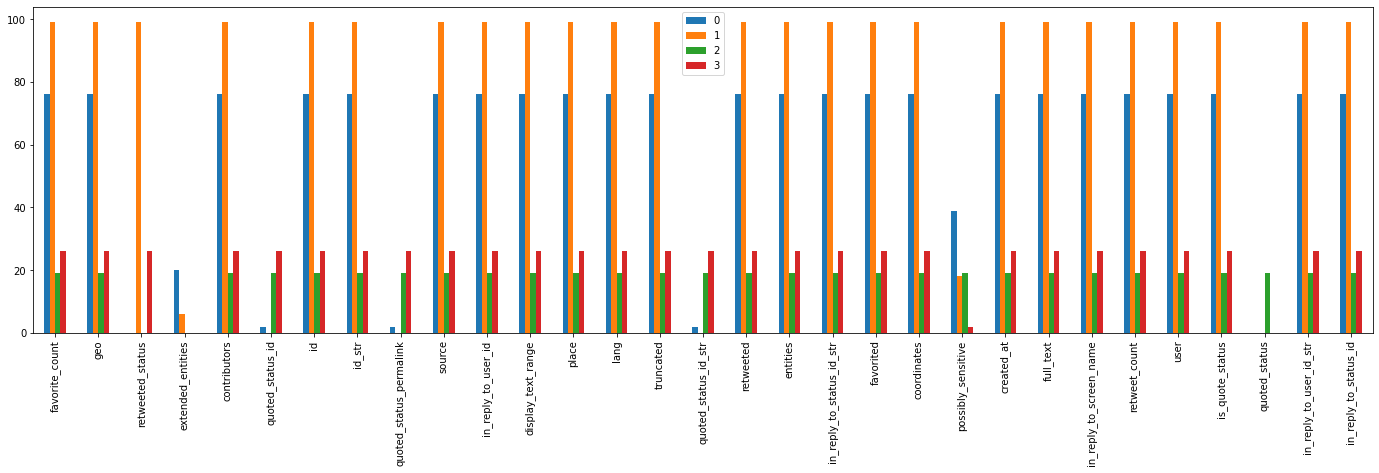

In [17]:
df.plot(kind='bar', figsize=(24,6))

In [18]:
for i in f3:
    if not ("full_text" in i["quoted_status"]):
            print(i)

In [22]:
f2[5]

{'created_at': 'Mon May 20 13:47:01 +0000 2019',
 'id': 1130469980447924224,
 'id_str': '1130469980447924224',
 'full_text': 'RT @TechAtBloomberg: Today at FLAIRS-32 (3:15 PM), NLP Architect @astent will present research about stock return predictions co-authored b…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'TechAtBloomberg',
    'name': 'Tech At Bloomberg',
    'id': 2735003034,
    'id_str': '2735003034',
    'indices': [3, 19]},
   {'screen_name': 'astent',
    'name': 'Amanda Stent',
    'id': 132574639,
    'id_str': '132574639',
    'indices': [65, 72]}],
  'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 9585432,
  'id_str': '9585432',
  'name':

In [20]:
geos = []
for t in tqdm(Q):
    if t["place"] is not None:
        geos.append(t)
    elif t['coordinates'] is not None:
        geos.append(t)

100%|████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 440031.89it/s]


In [21]:
geos

[]